### DINC Job initialization and running

##### Step 1 - Load all possible inputs for single receptor docking

In [1]:
from glob import glob
from pathlib import Path
import pandas as pd
from dinc_ensemble import init_dinc_ensemble_threads, dinc_full_run


In [2]:
from dinc_ensemble import DINC_CORE_PARAMS

In [3]:
root_dir = "../data/pdbbind_test_ligands/"
all_ligands = glob(root_dir+"*.mol2")
lig_paths = [Path(l) for l in all_ligands]
lig_pdb_ids = [p.stem.split("_")[0] for p in lig_paths]
lig_pdb_dofs = [int(p.stem.split("_")[-1]) for p in lig_paths]
inputs_df = pd.DataFrame({
    "pdb_id" : lig_pdb_ids,
    "lig_dof" : lig_pdb_dofs,
    "lig_path" : lig_paths
})
inputs_df["rec_path"] = inputs_df.apply(lambda row: root_dir+"{}_receptor_dof_{}.pdb".format(row.pdb_id, row.lig_dof), 
                                        axis=1)

In [4]:
inputs_df

,pdb_id,lig_dof,lig_path,rec_path
0,1a61,12,../data/pdbbind_test_ligands/1a61_ligand_dof_1...,../data/pdbbind_test_ligands/1a61_receptor_dof...
1,5a4l,0,../data/pdbbind_test_ligands/5a4l_ligand_dof_0...,../data/pdbbind_test_ligands/5a4l_receptor_dof...
2,3d14,4,../data/pdbbind_test_ligands/3d14_ligand_dof_4...,../data/pdbbind_test_ligands/3d14_receptor_dof...
3,6bhi,30,../data/pdbbind_test_ligands/6bhi_ligand_dof_3...,../data/pdbbind_test_ligands/6bhi_receptor_dof...
4,3ckt,14,../data/pdbbind_test_ligands/3ckt_ligand_dof_1...,../data/pdbbind_test_ligands/3ckt_receptor_dof...
...,...,...,...,...
148,5dy5,11,../data/pdbbind_test_ligands/5dy5_ligand_dof_1...,../data/pdbbind_test_ligands/5dy5_receptor_dof...
149,1l5q,0,../data/pdbbind_test_ligands/1l5q_ligand_dof_0...,../data/pdbbind_test_ligands/1l5q_receptor_dof...
150,2xzq,34,../data/pdbbind_test_ligands/2xzq_ligand_dof_3...,../data/pdbbind_test_ligands/2xzq_receptor_dof...
151,2pjt,10,../data/pdbbind_test_ligands/2pjt_ligand_dof_1...,../data/pdbbind_test_ligands/2pjt_receptor_dof...


In [5]:
inputs_df[inputs_df["lig_dof"]==40]

,pdb_id,lig_dof,lig_path,rec_path
32,1h24,40,../data/pdbbind_test_ligands/1h24_ligand_dof_4...,../data/pdbbind_test_ligands/1h24_receptor_dof...
51,4u91,40,../data/pdbbind_test_ligands/4u91_ligand_dof_4...,../data/pdbbind_test_ligands/4u91_receptor_dof...
132,4qyo,40,../data/pdbbind_test_ligands/4qyo_ligand_dof_4...,../data/pdbbind_test_ligands/4qyo_receptor_dof...


#### Step 2 - Pick an example from the list and initialize the dinc jobs

In [6]:
sele_index = 51
lig_path = inputs_df.iloc[sele_index].lig_path
rec_path = inputs_df.iloc[sele_index].rec_path
out_dir = "./test_output_{}".format(inputs_df.iloc[sele_index].pdb_id)

### Step 3 - Initialize the dinc jobs

In [7]:
#out_dir = out_dir+"_classic"

In [7]:
DINC_CORE_PARAMS.output_dir = out_dir

In [8]:
from dinc_ensemble.parameters.core import DINC_DOCK_TYPE
from dinc_ensemble.parameters import VINA_ENGINE_PARAMS, DINC_FRAG_PARAMS
from dinc_ensemble.parameters.fragment import *


In [9]:
DINC_CORE_PARAMS.dock_type = DINC_DOCK_TYPE.INCREMENTAL

In [10]:
import multiprocess

In [11]:
multiprocess.cpu_count()

8

In [15]:
VINA_ENGINE_PARAMS.exhaustive=1
VINA_ENGINE_PARAMS.cpu_count = 8
DINC_CORE_PARAMS.replica_num = 4

In [19]:
DINC_FRAG_PARAMS.frag_mode = DINC_FRAGMENT_MODE.MANUAL
DINC_FRAG_PARAMS.frag_new = 3
DINC_FRAG_PARAMS.frag_size = 2

In [17]:
res_df, res_job_elems, run_info = init_dinc_ensemble_threads(str(lig_path), 
                                                   [rec_path])

-------------------------------------
DINC-Ensemble: Preparing the file structure for jobs
-------------------------------------
Copying ligand to test_output_4u91/ligand
Run root directory: test_output_4u91
Run ligand directory: test_output_4u91/ligand
Ensemble/Receptor directory: test_output_4u91/ensemble
Run analysis directory: test_output_4u91/analysis
-------------------------------------
DINC-Ensemble: Preparing binding box!
-------------------------------------
Setting binding box center to ligand
Setting binding box dimensions to ligand
[31.7472, 41.0394, 215.7458] [23.961, 34.755399999999995, 25.26389999999998]
-------------------------------------
DINC-Ensemble: Loading thread data!
-------------------------------------
LPO: allowed_bonds= backbone
addinghydrogens!
added  0  hydrogens
merged  []  lonepairs
charges_to_add= gasteiger
in addCharges:mol.name= 4u91_ligand_dof_40  and charges_to_add= gasteiger
adding gasteiger charges to peptide
self.chargeType= gasteiger
added gas

KeyboardInterrupt: 

In [31]:
res_df

,job_name,receptor_name,ligand_name,replica,fragment_id,fragment_cnt,progress
0,job_3pj2_receptor_dof_10_3pj2_ligand_dof_10,3pj2_receptor_dof_10,3pj2_ligand_dof_10,0,0,10,0
1,job_3pj2_receptor_dof_10_3pj2_ligand_dof_10,3pj2_receptor_dof_10,3pj2_ligand_dof_10,1,0,10,0
2,job_3pj2_receptor_dof_10_3pj2_ligand_dof_10,3pj2_receptor_dof_10,3pj2_ligand_dof_10,2,0,10,0
3,job_3pj2_receptor_dof_10_3pj2_ligand_dof_10,3pj2_receptor_dof_10,3pj2_ligand_dof_10,3,0,10,0


In [32]:
res_job_elems[0].data.fragment.split_frags

In [20]:
from dinc_ensemble import dinc_full_run
tmp_res = dinc_full_run(str(lig_path), [str(rec_path)])

-------------------------------------
DINC-Ensemble: Preparing the file structure for jobs
-------------------------------------
Copying ligand to test_output_4u91/ligand
Run root directory: test_output_4u91
Run ligand directory: test_output_4u91/ligand
Ensemble/Receptor directory: test_output_4u91/ensemble
Run analysis directory: test_output_4u91/analysis
-------------------------------------
DINC-Ensemble: Preparing binding box!
-------------------------------------
Setting binding box center to ligand
Setting binding box dimensions to ligand
[31.7472, 41.0394, 215.7458] [23.961, 34.755399999999995, 25.26389999999998]
-------------------------------------
DINC-Ensemble: Loading thread data!
-------------------------------------
LPO: allowed_bonds= backbone
addinghydrogens!
added  0  hydrogens
merged  []  lonepairs
charges_to_add= gasteiger
in addCharges:mol.name= 4u91_ligand_dof_40  and charges_to_add= gasteiger
adding gasteiger charges to peptide
self.chargeType= gasteiger
added gas

Exception in thread Thread-93:
Traceback (most recent call last):
  File "/home/anja/mambaforge-pypy3/envs/dincE-py3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
Exception in thread Thread-92:
Traceback (most recent call last):
  File "/home/anja/mambaforge-pypy3/envs/dincE-py3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
Exception in thread Thread-94:
Traceback (most recent call last):
  File "/home/anja/mambaforge-pypy3/envs/dincE-py3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/home/anja/Documents/dinc-ensemble/dinc-ensemble-bin/dinc_ensemble/docking/threads/dinc_vina_thread.py", line 155, in run
Exception in thread Thread-95:
Traceback (most recent call last):
  File "/home/anja/mambaforge-pypy3/envs/dincE-py3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.score()
  File "/home/anja/Documents/dinc-ensemble/dinc-ensemble-bin/dinc_ensemble/docking/threads/dinc_vina_thread.py", line 56, in s

Computing Vina grid ... -------------------------------------
DINC-Ensemble: Thread for - Job #job_4u91_receptor_dof_40_4u91_ligand_dof_40; Fragment11;
-------------------------------------
Starting thread
done.
Starting thread
Starting thread
Starting thread
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/anja/mambaforge-pypy3/envs/dincE-py3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_3707902/680329665.py", line 2, in <module>
    tmp_res = dinc_full_run(str(lig_path), [str(rec_path)])
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/anja/Documents/dinc-ensemble/dinc-ensemble-bin/dinc_ensemble/docking/dinc_run.py", line 76, in dinc_full_run
  File "/home/anja/Documents/dinc-ensemble/dinc-ensemble-bin/dinc_ensemble/docking/threads/dinc_vina_thread.py", line 181, in next_step
    res = pd.read_csv(results_file)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/anja/mambaforge-pypy3/envs/dincE-py3/lib/python3.11/site-packages/pandas/io/parsers/readers.py", line 948, in read_csv
    return _read(filepath_or_buffer, kwds)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/anja/mambaforge-pypy3/e

In [ ]:
tmp_res

-------------------------------------
DINC-Ensemble: Preparing the file structure for jobs
-------------------------------------
Copying ligand to test_output_1q3w/ligand
Run root directory: test_output_1q3w
Run ligand directory: test_output_1q3w/ligand
Ensemble/Receptor directory: test_output_1q3w/ensemble
Run analysis directory: test_output_1q3w/analysis
-------------------------------------
DINC-Ensemble: Preparing binding box!
-------------------------------------
Setting binding box center to ligand
Setting binding box dimensions to ligand
[22.8674, -17.5582, 9.1859] [21.3222, 16.790999999999997, 14.9082]
-------------------------------------
DINC-Ensemble: Loading thread data!
-------------------------------------
LPO: allowed_bonds= backbone
addinghydrogens!
added  0  hydrogens
merged  []  lonepairs
charges_to_add= gasteiger
in addCharges:mol.name= 1q3w_ligand_dof_1  and charges_to_add= gasteiger
self.chargeType= gasteiger
added gasteigercharges to  1q3w_ligand_dof_1
merged  9  

adding gasteiger charges to peptide
-------------------------------------
DINC-Ensemble: Loaded receptors
-------------------------------------


In [13]:
res_df["progress"] = res_df["fragment_id"]
res_df["frag_cnt"] = res_df.apply( lambda x: res_job_elems[x.name].data.ligand.molkit_molecule.torscount, 
                                                   axis = 1)

In [14]:
res_df

,job_name,receptor_name,ligand_name,replica,fragment_id,progress,frag_cnt
0,job_1a61_receptor_dof_12_1a61_ligand_dof_12,1a61_receptor_dof_12,1a61_ligand_dof_12,0,0,0,14
1,job_1a61_receptor_dof_12_1a61_ligand_dof_12,1a61_receptor_dof_12,1a61_ligand_dof_12,1,0,0,14
2,job_1a61_receptor_dof_12_1a61_ligand_dof_12,1a61_receptor_dof_12,1a61_ligand_dof_12,2,0,0,14
3,job_1a61_receptor_dof_12_1a61_ligand_dof_12,1a61_receptor_dof_12,1a61_ligand_dof_12,3,0,0,14


In [15]:
res_job_elems[0].molecule

AttributeError: 'DINCThreadElem' object has no attribute 'molecule'

In [23]:
import os

In [25]:
os.listdir(run_info.analysis)

[]

In [17]:
df = pd.read_csv(run_info.root / "progress.csv")

In [18]:
df

,Unnamed: 0,job_name,receptor_name,ligand_name,replica,fragment_id,progress,frag_cnt
0,0,job_1a61_receptor_dof_12_1a61_ligand_dof_12,1a61_receptor_dof_12,1a61_ligand_dof_12,0,0,0,0
1,1,job_1a61_receptor_dof_12_1a61_ligand_dof_12,1a61_receptor_dof_12,1a61_ligand_dof_12,1,0,0,0
2,2,job_1a61_receptor_dof_12_1a61_ligand_dof_12,1a61_receptor_dof_12,1a61_ligand_dof_12,2,0,0,0
3,3,job_1a61_receptor_dof_12_1a61_ligand_dof_12,1a61_receptor_dof_12,1a61_ligand_dof_12,3,0,0,0


In [20]:
df[(df["job_name"]==res_job_elems[0].job_info.job_name) \
   & \
    (df["replica"]==res_job_elems[0].data.replica) ]

,Unnamed: 0,job_name,receptor_name,ligand_name,replica,fragment_id,progress,frag_cnt
0,0,job_1a61_receptor_dof_12_1a61_ligand_dof_12,1a61_receptor_dof_12,1a61_ligand_dof_12,0,0,0,0


In [ ]:
res_df["frag_cnt"] = res_df.apply( lambda x: dinc_thread_elem[x.name].data.ligand._molkit_molecule, 
                                                   axis = 1)

In [23]:
lig_path

PosixPath('../data/pdbbind_test_ligands/1q3w_ligand_dof_1.mol2')

-------------------------------------
DINC-Ensemble: Preparing the file structure for jobs
-------------------------------------
Copying ligand to test_output_1q3w/ligand
Run root directory: test_output_1q3w
Run ligand directory: test_output_1q3w/ligand
Ensemble/Receptor directory: test_output_1q3w/ensemble
Run analysis directory: test_output_1q3w/analysis
-------------------------------------
DINC-Ensemble: Preparing binding box!
-------------------------------------
Setting binding box center to ligand
Setting binding box dimensions to ligand
[22.8674, -17.5582, 9.1859] [21.3222, 16.790999999999997, 14.9082]
-------------------------------------
DINC-Ensemble: Loading thread data!
-------------------------------------
LPO: allowed_bonds= backbone
addinghydrogens!
added  0  hydrogens
merged  []  lonepairs
charges_to_add= gasteiger
in addCharges:mol.name= 1q3w_ligand_dof_1  and charges_to_add= gasteiger
self.chargeType= gasteiger
added gasteigercharges to  1q3w_ligand_dof_1
merged  9  

AttributeError: 'list' object has no attribute 'job_info'

In [13]:
tmp_res = dinc_full_run(str(lig_path),[rec_path])

-------------------------------------
DINC-Ensemble: Preparing the file structure for jobs
-------------------------------------
Copying ligand to test_output_1a61/ligand
Run root directory: test_output_1a61
Run ligand directory: test_output_1a61/ligand
Ensemble/Receptor directory: test_output_1a61/ensemble
Run analysis directory: test_output_1a61/analysis
-------------------------------------
DINC-Ensemble: Preparing binding box!
-------------------------------------
Setting binding box center to ligand
Setting binding box dimensions to ligand
[16.1252, -13.5231, 22.0535] [24.1915, 18.1247, 21.417499999999997]
-------------------------------------
DINC-Ensemble: Loading thread data!
-------------------------------------
LPO: allowed_bonds= backbone
addinghydrogens!
added  1  hydrogens
merged  []  lonepairs
charges_to_add= gasteiger
in addCharges:mol.name= 1a61_ligand_dof_12  and charges_to_add= gasteiger
self.chargeType= gasteiger
added gasteigercharges to  1a61_ligand_dof_12
merged  

[23:27:50] Explicit valence for atom # 23 O, 3, is greater than permitted


adding gasteiger charges to peptide
DINC-Ensemble: Loaded receptors
-------------------------------------
DINCEnsemble thread init for: 
-------------------------------------
Fragment: 1a61_ligand_dof_12
Receptor: 1a61_receptor_dof_12
Computing Vina grid ... done.
Randomize conformation (random seed: 400191798) ... done.
Clash penalty: 0
-------------------------------------
DINCEnsemble thread init for: 
-------------------------------------
Fragment: 1a61_ligand_dof_12
Receptor: 1a61_receptor_dof_12
Computing Vina grid ... done.
Computing Vina grid ... done.
Randomize conformation (random seed: 633388908) ... done.
Clash penalty: 0
Number of local optimization steps: 24
Before local optimization:
Estimated Free Energy of Binding   : -1.886 (kcal/mol) [=(1)+(2)+(3)-(4)]
(1) Final Intermolecular Energy    : -3.264 (kcal/mol)
    Ligand - Receptor              : -3.264 (kcal/mol)
    Ligand - Flex side chains      : 0.000 (kcal/mol)
(2) Final Total Internal Energy    : -1.659 (kcal/mol)

[23:29:49] Explicit valence for atom # 42 N, 4, is greater than permitted
[23:29:50] Explicit valence for atom # 42 N, 4, is greater than permitted


DINCEnsemble warning: not all atoms were mapped between the RDKit and MolKit molecules!
DINCEnsemble warning: not all bonds were mapped between the RDKit and MolKit molecules!
DINCEnsemble warning: not all bonds were mapped between the RDKit and MolKit molecules!
LPO: allowed_bonds= backbone
addinghydrogens!
added  1  hydrogens
merged  []  lonepairs
charges_to_add= gasteiger
in addCharges:mol.name= 1a61_ligand_dof_12frag0__rep_0_out_model1  and charges_to_add= gasteiger
self.chargeType= gasteiger
added gasteigercharges to  1a61_ligand_dof_12frag0__rep_0_out_model1
merged  1  nonpolar hydrogens
end of base class init
using std outputfilename  1a61_ligand_dof_12frag0__rep_0_out.pdbqt
DINC Warning: Molkit molecule and RDKit molecule are inconsistent!
DINC Warning: Molkit molecule and RDKit molecule are inconsistent!
DINC Warning: Rdkit atom valence error!
DINCEnsemble warning: not all atoms were mapped between the RDKit and MolKit molecules!
DINCEnsemble warning: not all bonds were mapped

[23:29:50] Explicit valence for atom # 42 N, 4, is greater than permitted
[23:29:50] Explicit valence for atom # 42 N, 4, is greater than permitted


using std outputfilename  1a61_ligand_dof_12frag0__rep_1_out.pdbqt
DINC Warning: Molkit molecule and RDKit molecule are inconsistent!
DINC Warning: Molkit molecule and RDKit molecule are inconsistent!
DINC Warning: Rdkit atom valence error!
DINCEnsemble warning: not all atoms were mapped between the RDKit and MolKit molecules!
DINCEnsemble warning: not all bonds were mapped between the RDKit and MolKit molecules!
DINCEnsemble warning: not all bonds were mapped between the RDKit and MolKit molecules!
LPO: allowed_bonds= backbone
addinghydrogens!
added  1  hydrogens
merged  []  lonepairs
charges_to_add= gasteiger
in addCharges:mol.name= 1a61_ligand_dof_12frag0__rep_1_out_model4  and charges_to_add= gasteiger
self.chargeType= gasteiger
added gasteigercharges to  1a61_ligand_dof_12frag0__rep_1_out_model4
merged  1  nonpolar hydrogens
end of base class init
using std outputfilename  1a61_ligand_dof_12frag0__rep_1_out.pdbqt
DINC Warning: Molkit molecule and RDKit molecule are inconsistent!
D

[23:29:50] Explicit valence for atom # 42 N, 4, is greater than permitted


In [14]:
all_results = tmp_res[0]

TypeError: 'NoneType' object is not subscriptable

In [ ]:
dinc_job_threads = tmp_res[1]

In [ ]:
len(dinc_job_threads)

2

In [ ]:
from copy import deepcopy

In [19]:
from dinc_ensemble import write_ligand

In [43]:
from dinc_ensemble.ligand import DINCMolecule

In [28]:
from MolKit.pdbWriter import PdbWriter as MolKitPdbWriter
writer = MolKitPdbWriter()


In [32]:
from dinc_ensemble.ligand import DINCMolecule

In [33]:
lig = DINCMolecule(thr.conformations[0].mol)

LPO: allowed_bonds= backbone
addinghydrogens!
added  1  hydrogens
merged  []  lonepairs
charges_to_add= gasteiger
in addCharges:mol.name= 1a61_ligand_dof_12frag0__rep_1_out_model1  and charges_to_add= gasteiger
self.chargeType= gasteiger
added gasteigercharges to  1a61_ligand_dof_12frag0__rep_1_out_model1
merged  1  nonpolar hydrogens
end of base class init
using std outputfilename  1a61_ligand_dof_12frag0__rep_1_out.pdbqt
DINC Warning: Molkit molecule and RDKit molecule are inconsistent!
DINC Warning: Molkit molecule and RDKit molecule are inconsistent!
DINC Warning: Rdkit atom valence error!
DINCEnsemble warning: not all atoms were mapped between the RDKit and MolKit molecules!
DINCEnsemble warning: not all bonds were mapped between the RDKit and MolKit molecules!
DINCEnsemble warning: not all bonds were mapped between the RDKit and MolKit molecules!


[22:47:17] Explicit valence for atom # 42 N, 4, is greater than permitted


In [ ]:
load_ligand(lig_path)

In [40]:
lig.molkit_molecule.allAtoms.bonds[0][0].atom1.name

'C15'

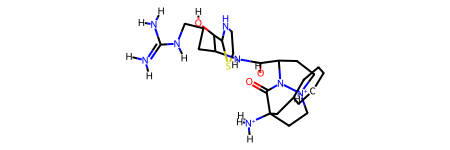

In [34]:
lig._rdkit_molecule

In [42]:
write_ligand(lig, "tmp.pdb")

In [31]:
print(writer.write("tmp.pdb", thr.conformations[0].mol))

REMARK   4 XXXX COMPLIES WITH FORMAT V. 2.0
ATOM      1  C15 00N d   1      16.740 -13.110  20.130  0.00  0.00      1a61 C  
ATOM      2  C14 00N d   1      17.879 -12.955  20.966  0.00  0.00      1a61 C  
ATOM      3  N2  00N d   1      17.981 -14.355  21.537  0.00  0.00      1a61 N  
ATOM      4  N3  00N d   1      19.203 -14.970  21.046  0.00  0.00      1a61 N  
ATOM      5  C8  00N d   1      17.124 -14.844  22.391  0.00  0.00      1a61 C  
ATOM      6  C11 00N d   1      19.642 -16.185  21.747  0.00  0.00      1a61 C  
ATOM      7  C12 00N d   1      20.062 -13.804  20.858  0.00  0.00      1a61 C  
ATOM      8  H9  00N d   1      19.006 -15.309  20.117  0.00  0.00      1a61 H  
ATOM      9  C10 00N d   1      18.509 -16.969  22.449  0.00  0.00      1a61 C  
ATOM     10  C9  00N d   1      17.339 -16.213  23.017  0.00  0.00      1a61 C  
ATOM     11  C13 00N d   1      18.990 -12.980  19.977  0.00  0.00      1a61 C  
ATOM     12  O1  00N d   1      16.058 -14.242  22.762  0.00  0.0

In [26]:
thr.conformations[0].

{'mol': <Protein instance> 1a61_ligand_dof_12frag0__rep_1_out_model1 with 1 <class 'MolKit.protein.Chain'>,
 'origin': [0, 0, 0],
 'translation': [0, 0, 0],
 'quaternion': [1, 0, 0, 0],
 'torsions': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'cluster_dict': {},
 'coords': [[16.74, -13.11, 20.13],
  [17.879, -12.955, 20.966],
  [17.98099977111817, -14.354999656677233, 21.536999160766605],
  [19.20299977111817, -14.969999656677233, 21.045999160766605],
  [17.123999771118168, -14.843999656677232, 22.390999160766604],
  [19.64199977111817, -16.18499965667723, 21.746999160766606],
  [20.06199977111817, -13.803999656677233, 20.857999160766607],
  [19.00599977111817, -15.308999656677232, 20.116999160766607],
  [18.50899977111817, -16.968999656677234, 22.448999160766608],
  [17.338999771118168, -16.212999656677233, 23.016999160766606],
  [18.989999771118168, -12.979999656677233, 19.976999160766606],
  [16.05799977111817, -14.241999656677233, 22.761999160766607],
  [16.00399977111817, -16.813

In [13]:
res_job_elems

[]

In [16]:
inputs_df

,pdb_id,lig_dof,lig_path
0,1a61,12,../data/pdbbind_test_ligands/1a61_ligand_dof_1...
1,5a4l,0,../data/pdbbind_test_ligands/5a4l_ligand_dof_0...
2,3d14,4,../data/pdbbind_test_ligands/3d14_ligand_dof_4...
3,6bhi,30,../data/pdbbind_test_ligands/6bhi_ligand_dof_3...
4,3ckt,14,../data/pdbbind_test_ligands/3ckt_ligand_dof_1...
...,...,...,...
148,5dy5,11,../data/pdbbind_test_ligands/5dy5_ligand_dof_1...
149,1l5q,0,../data/pdbbind_test_ligands/1l5q_ligand_dof_0...
150,2xzq,34,../data/pdbbind_test_ligands/2xzq_ligand_dof_3...
151,2pjt,10,../data/pdbbind_test_ligands/2pjt_ligand_dof_1...


In [12]:
all_ligands

['../data/pdbbind_test_ligands/1a61_ligand_dof_12.mol2',
 '../data/pdbbind_test_ligands/5a4l_ligand_dof_0.mol2',
 '../data/pdbbind_test_ligands/3d14_ligand_dof_4.mol2',
 '../data/pdbbind_test_ligands/6bhi_ligand_dof_30.mol2',
 '../data/pdbbind_test_ligands/3ckt_ligand_dof_14.mol2',
 '../data/pdbbind_test_ligands/3ljt_ligand_dof_8.mol2',
 '../data/pdbbind_test_ligands/3dcq_ligand_dof_13.mol2',
 '../data/pdbbind_test_ligands/3oe0_ligand_dof_49.mol2',
 '../data/pdbbind_test_ligands/2i4p_ligand_dof_13.mol2',
 '../data/pdbbind_test_ligands/5v3x_ligand_dof_7.mol2',
 '../data/pdbbind_test_ligands/1klu_ligand_dof_50.mol2',
 '../data/pdbbind_test_ligands/5brz_ligand_dof_32.mol2',
 '../data/pdbbind_test_ligands/4nmo_ligand_dof_30.mol2',
 '../data/pdbbind_test_ligands/4c4n_ligand_dof_42.mol2',
 '../data/pdbbind_test_ligands/6mnf_ligand_dof_47.mol2',
 '../data/pdbbind_test_ligands/2aoh_ligand_dof_37.mol2',
 '../data/pdbbind_test_ligands/5qck_ligand_dof_8.mol2',
 '../data/pdbbind_test_ligands/1joj_

In [9]:
%ls ..data

ls: cannot access '..data': No such file or directory


ligand_file

In [2]:
from dinc_ensemble.docking.dinc_init import init_dinc_ensemble_jobs, prepare_bbox

In [4]:
receptors = glob("../data/ensemble_example/ER/receptors/*")
ligands = glob("../data/ensemble_example/ER/ligands/*")
print(receptors)
print(ligands)

['../data/ensemble_example/ER/receptors/1a52_pdbfixed.pdbqt', '../data/ensemble_example/ER/receptors/5ufx_pdbfixed.pdbqt', '../data/ensemble_example/ER/receptors/7msa_pdbfixed.pdbqt', '../data/ensemble_example/ER/receptors/5dtv_pdbfixed.pdbqt']
['../data/ensemble_example/ER/ligands/6c42_lig_A.mol2', '../data/ensemble_example/ER/ligands/5ufx_lig_A.mol2', '../data/ensemble_example/ER/ligands/5w9d_lig_A.mol2', '../data/ensemble_example/ER/ligands/5ufw_lig_A.mol2']


In [5]:
DINC_CORE_PARAMS.output_dir = "../data/output_tests"

In [6]:
ligands[0]

'../data/ensemble_example/ER/ligands/6c42_lig_A.mol2'

In [7]:
from dinc_ensemble.docking.utils.utils_prep_receptor import align_receptors, prepare_bbox

In [8]:
prepare_bbox(dinc_jobs_df[1][0].paths.ligand, 
             [dinc_jobs_df[1][0].paths.receptor])

NameError: name 'dinc_jobs_df' is not defined

In [9]:
from dinc_ensemble.docking.dinc_run import dinc_run

In [10]:
dinc_run(ligands[0], receptors)

../data/output_tests/ensemble
-------------------------------------
DINC-Ensemble: Preparing binding box!
-------------------------------------
DINC-Ensemble: Setting binding box center to ligand
DINC-Ensemble: Setting binding box dimensions to ligand
[-2.6303, -31.2884, 24.5408] [16.842, 20.183999999999997, 21.288]
ASSIGNING NEW NAMES
renamed 33 atoms: each newname is the original name of the atom plus its (1-based) uniqIndex
setting up LPO with mode= automatic and outputfilename=  None
and check_for_fragments= False
and bonds_to_inactivate= 
LPO: allowed_bonds= backbone
addinghydrogens!
added  8  hydrogens
merged  []  lonepairs
charges_to_add= gasteiger
in addCharges:mol.name= 6c42_lig_A  and charges_to_add= gasteiger
self.chargeType= gasteiger
added gasteigercharges to  6c42_lig_A
merged  6  nonpolar hydrogens
end of base class init
using std outputfilename  6c42_lig_A.pdbqt
returning  0
No change in atomic coordinates
renamed 35 atoms: each newname is the original name of the atom 

In [8]:
dinc_jobs_df = init_dinc_ensemble_jobs(ligands[0], receptors)

../data/output_tests/ensemble
-------------------------------------
DINC-Ensemble: Preparing binding box!
-------------------------------------
DINC-Ensemble: Setting binding box center to ligand
DINC-Ensemble: Setting binding box dimensions to ligand
[-2.6303, -31.2884, 24.5408] [16.842, 20.183999999999997, 21.288]
ASSIGNING NEW NAMES
renamed 33 atoms: each newname is the original name of the atom plus its (1-based) uniqIndex
setting up LPO with mode= automatic and outputfilename=  None
and check_for_fragments= False
and bonds_to_inactivate= 
LPO: allowed_bonds= backbone
addinghydrogens!
added  8  hydrogens
merged  []  lonepairs
charges_to_add= gasteiger
in addCharges:mol.name= 6c42_lig_A  and charges_to_add= gasteiger
self.chargeType= gasteiger
added gasteigercharges to  6c42_lig_A
merged  6  nonpolar hydrogens
end of base class init
using std outputfilename  6c42_lig_A.pdbqt
returning  0
No change in atomic coordinates
renamed 35 atoms: each newname is the original name of the atom 

In [9]:
from dinc_ensemble.docking.threads.dinc_vina_thread import DINCDockThreadVina

In [10]:
dinc_job1 = DINCDockThreadVina(dinc_jobs_df[1][0])

DINCEnsemble thread init for: 
Fragment: 6c42_lig_A
Receptor: 1a52_pdbfixed_aligned


In [12]:
dinc_job1.prepare()

Computing Vina grid ... done.


In [12]:
dinc_job1.score()

In [16]:
dinc_job1.vina.optimize()

Number of local optimization steps: 20
Before local optimization:
Estimated Free Energy of Binding   : 0.000 (kcal/mol) [=(1)+(2)+(3)-(4)]
(1) Final Intermolecular Energy    : 0.000 (kcal/mol)
    Ligand - Receptor              : 0.000 (kcal/mol)
    Ligand - Flex side chains      : 0.000 (kcal/mol)
(2) Final Total Internal Energy    : -1.371 (kcal/mol)
    Ligand                         : -1.371 (kcal/mol)
    Flex   - Receptor              : 0.000 (kcal/mol)
    Flex   - Flex side chains      : 0.000 (kcal/mol)
(3) Torsional Free Energy          : 0.000 (kcal/mol)
(4) Unbound System's Energy        : -1.371 (kcal/mol)
Performing local search ... done.


array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   , -2.178,  0.   , -2.178])

In [15]:
dinc_job1.vina.dock()

Performing docking (random seed: -1789098026) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************
done.
ENERGY FROM SEARCH: -2.7419
FINAL ENERGY: 
Estimated Free Energy of Binding   : 0.000 (kcal/mol) [=(1)+(2)+(3)-(4)]
(1) Final Intermolecular Energy    : 0.000 (kcal/mol)
    Ligand - Receptor              : 0.000 (kcal/mol)
    Ligand - Flex side chains      : 0.000 (kcal/mol)
(2) Final Total Internal Energy    : -2.742 (kcal/mol)
    Ligand                         : -2.742 (kcal/mol)
    Flex   - Receptor              : 0.000 (kcal/mol)
    Flex   - Flex side chains      : 0.000 (kcal/mol)
(3) Torsional Free Energy          : 0.000 (kcal/mol)
(4) Unbound System's Energy        : -2.742 (kcal/mol)
ENERGY FROM SEARCH: -2.742
FINAL ENERGY: 
Estimated Free Energy of Binding   : 0.000 (kcal/mol) [=(1)+(2)+(3)-(4)]
(1) Final Intermolecular Energy    : 0.000 (kcal/mol)
    Ligand

In [16]:
dinc_job1.analyze_results()

In [59]:
tmp_pdbqt = dinc_job1.vina.poses()

In [60]:
tmp_pdbqt.split("MODEL")

['',
 " 1\nREMARK VINA RESULT:     0.000      0.000      0.000\nREMARK INTER + INTRA:          -2.742\nREMARK INTER:                   0.000\nREMARK INTRA:                  -2.742\nREMARK UNBOUND:                -2.742\nREMARK  8 active torsions:\nREMARK  status: ('A' for Active; 'I' for Inactive)\nREMARK    1  A    between atoms: N_5  and  C6_6 \nREMARK    2  A    between atoms: C6_6  and  C7_7 \nREMARK    3  A    between atoms: C7_7  and  O8_8 \nREMARK    4  A    between atoms: O8_8  and  C9_9 \nREMARK    5  A    between atoms: C14_14  and  C15_15 \nREMARK    6  A    between atoms: C19_19  and  O20_20 \nREMARK    7  A    between atoms: C26_27  and  C27_28 \nREMARK    8  A    between atoms: C30_31  and  O_32 \nROOT\nATOM      1  C15 UNL d   1      -0.735 -36.823  17.759  0.00  0.00     0.117 C \nATOM      2  O16 UNL d   1       0.609 -36.485  18.002  0.00  0.00    -0.298 OA\nATOM      3  C17 UNL d   1       1.143 -35.390  17.311  0.00  0.00     0.140 A \nATOM      4  C18 UNL d   1    

In [61]:
dinc_job1.vina.energies().shape

(9, 5)

In [54]:
dinc_job1.vina.info()

{'rigid_receptor': '../data/output_tests/job_1a52_pdbfixed_aligned_6c42_lig_A/1a52_pdbfixed_aligned.pdbqt',
 'flex_receptor': None,
 'ligands': ["REMARK  8 active torsions:\nREMARK  status: ('A' for Active; 'I' for Inactive)\nREMARK    1  A    between atoms: N_5  and  C6_6 \nREMARK    2  A    between atoms: C6_6  and  C7_7 \nREMARK    3  A    between atoms: C7_7  and  O8_8 \nREMARK    4  A    between atoms: O8_8  and  C9_9 \nREMARK    5  A    between atoms: C14_14  and  C15_15 \nREMARK    6  A    between atoms: C19_19  and  O20_20 \nREMARK    7  A    between atoms: C26_27  and  C27_28 \nREMARK    8  A    between atoms: C30_31  and  O_32 \nROOT\nATOM      1  C15 UNL d   1      -2.896 -31.315  26.822  0.00  0.00     0.117 C \nATOM      2  O16 UNL d   1      -3.661 -30.218  27.258  0.00  0.00    -0.298 OA\nATOM      3  C17 UNL d   1      -3.178 -28.933  26.984  0.00  0.00     0.140 A \nATOM      4  C18 UNL d   1      -4.065 -27.933  26.554  0.00  0.00    -0.073 A \nATOM      5  C19 UNL d 

In [36]:
from io import StringIO 
import sys

class Capturing(list):
    def __enter__(self):
        self._stdout = sys.stdout
        sys.stdout = self._stringio = StringIO()
        return self
    def __exit__(self, *args):
        self.extend(self._stringio.getvalue().splitlines())
        del self._stringio    # free up some memory
        sys.stdout = self._stdout

In [47]:
import io
from contextlib import redirect_stdout

f = io.StringIO()
with redirect_stdout(f):
    dinc_job1.vina.dock(exhaustiveness=2, n_poses=1, max_evals=3)
s = f.getvalue()

Performing docking (random seed: 765758410) ... 


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*done.
ENERGY FROM SEARCH: -2.1257
FINAL ENERGY: 
Estimated Free Energy of Binding   : 0.000 (kcal/mol) [=(1)+(2)+(3)-(4)]
(1) Final Intermolecular Energy    : 0.000 (kcal/mol)
    Ligand - Receptor              : 0.000 (kcal/mol)
    Ligand - Flex side chains      : 0.000 (kcal/mol)
(2) Final Total Internal Energy    : -2.126 (kcal/mol)
    Ligand                         : -2.126 (kcal/mol)
    Flex   - Receptor              : 0.000 (kcal/mol)
    Flex   - Flex side chains      : 0.000 (kcal/mol)
(3) Torsional Free Energy          : 0.000 (kcal/mol)
(4) Unbound System's Energy        : -2.126 (kcal/mol)

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       0.0000     0.0000     0.0000


In [45]:
s

''

In [40]:
f.getvalue()

''

In [38]:
output

[]

Performing docking (random seed: 765758410) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*done.
ENERGY FROM SEARCH: -1.9432
FINAL ENERGY: 
Estimated Free Energy of Binding   : 0.000 (kcal/mol) [=(1)+(2)+(3)-(4)]
(1) Final Intermolecular Energy    : 0.000 (kcal/mol)
    Ligand - Receptor              : 0.000 (kcal/mol)
    Ligand - Flex side chains      : 0.000 (kcal/mol)
(2) Final Total Internal Energy    : -1.943 (kcal/mol)
    Ligand                         : -1.943 (kcal/mol)
    Flex   - Receptor              : 0.000 (kcal/mol)
    Flex   - Flex side chains      : 0.000 (kcal/mol)
(3) Torsional Free Energy          : 0.000 (kcal/mol)
(4) Unbound System's Energy        : -1.943 (kcal/mol)

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       0.0000     0.0000     0.0000


In [34]:
res